# üéØ Multimodal Uncertainty Quantification

<div style="background-color: rgba(200, 200, 200, 0.1); padding: 20px; border-radius: 8px; margin-bottom: 20px; border: 1px solid rgba(127, 127, 127, 0.2); max-width: 97.5%; overflow-wrap: break-word;">
  <p style="font-size: 16px; line-height: 1.6">
    The UQLM library offers Uncertainty Quantification (UQ) methods for multimodal inputs, given that outputs are text-based. This demo provides an minimal illustration 
    of how to use <code>uqlm</code> scorers for multimodal inputs. The following scorers offer multimodal compatibility:
  </p>
      
#### Black-Box (Consistency) Scorers
*   Non-Contradiction Probability ([Chen & Mueller, 2023](https://arxiv.org/abs/2308.16175); [Lin et al., 2025](https://arxiv.org/abs/2305.19187); [Manakul et al., 2023](https://arxiv.org/abs/2303.08896))
*   Semantic Negentropy (based on [Farquhar et al., 2024](https://www.nature.com/articles/s41586-024-07421-0); [Kuhn et al., 2023](https://arxiv.org/pdf/2302.09664))
*   Exact Match ([Cole et al., 2023](https://arxiv.org/abs/2305.14613); [Chen & Mueller, 2023](https://arxiv.org/abs/2308.16175))
*   BERT-score ([Manakul et al., 2023](https://arxiv.org/abs/2303.08896); [Zheng et al., 2020](https://arxiv.org/abs/1904.09675))
*   BLUERT ([Sellam et al., 2020](https://arxiv.org/abs/2004.04696))
*   Normalized Cosine Similarity ([Shorinwa et al., 2024](https://arxiv.org/pdf/2412.05563); [HuggingFace](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2))

#### White-Box (Token-Probability-Based) Scorers
*   Minimum token probability ([Manakul et al., 2023](https://arxiv.org/abs/2303.08896))
*   Length-Normalized Joint Token Probability ([Malinin & Gales, 2021](https://arxiv.org/pdf/2002.07650))
</div>

## üìä What You'll Do in This Demo

<div style="display: flex; margin-bottom: 15px; align-items: center">
  <div style="background-color: #34a853; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; justify-content: center; align-items: center; margin-right: 15px; flex-shrink: 0"><strong>1</strong></div>
  <div>
    <p style="margin: 0; font-weight: bold"><a href=#section1>Set up LLM and prompts.</a></p>
    <p style="margin: 0; color: rgba(95, 99, 104, 0.8)">Set up LLM instance and load example image-based data prompts.</p>
  </div>
</div>

<div style="display: flex; margin-bottom: 15px; align-items: center">
  <div style="background-color: #34a853; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; justify-content: center; align-items: center; margin-right: 15px; flex-shrink: 0"><strong>2</strong></div>
  <div>
    <p style="margin: 0; font-weight: bold"><a href=#section2>Generate LLM Responses and Confidence Scores</a></p>
    <p style="margin: 0; color: rgba(95, 99, 104, 0.8)">Generate and score LLM responses to the example image-based questions using the <code>BlackBoxUQ()</code> class.</p>
  </div>
</div>

<div style="display: flex; margin-bottom: 25px; align-items: center">
  <div style="background-color: #34a853; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; justify-content: center; align-items: center; margin-right: 15px; flex-shrink: 0"><strong>3</strong></div>
  <div>
    <p style="margin: 0; font-weight: bold"><a href=#section3>Evaluate Hallucination Detection Performance</a></p>
    <p style="margin: 0; color: rgba(95, 99, 104, 0.8)">Inspect which responses were correct/incorrect and compare to computed confidence scores.</p>
  </div>
</div>

## ‚öñÔ∏è Advantages & Limitations

<div style="display: flex; gap: 20px">
  <div style="flex: 1; background-color: rgba(0, 200, 0, 0.1); padding: 15px; border-radius: 8px; border: 1px solid rgba(0, 200, 0, 0.2)">
    <h3 style="color: #2e8b57; margin-top: 0">Pros</h3>
    <ul style="margin-bottom: 0">
      <li><strong>Broad Scorer Compatibility:</strong> Works with all black-box UQ and white-box scorers</li>
      <li><strong>Intuitive:</strong> Easy to understand and implement</li>
    </ul>
  </div>
  
  <div style="flex: 1; background-color: rgba(200, 0, 0, 0.1); padding: 15px; border-radius: 8px; border: 1px solid rgba(200, 0, 0, 0.2)">
    <h3 style="color: #b22222; margin-top: 0">Cons</h3>
    <ul style="margin-bottom: 0">
      <li><strong>Limited model compatibility:</strong> Requires that the provided LLM be compatibile with multimodal inputs</li>
      <li><strong>Beta Mode:</strong> Currently in beta mode with ongoing testing</li>
    </ul>
  </div>
</div>

<a id='section1'></a>
## 1. Set up LLM and Prompts

In this demo, we will illustrate multimodal functionality using questions based on a single image. To implement with your use case, simply **replace the example prompts with your data**.  

First, let's load and preview the image.

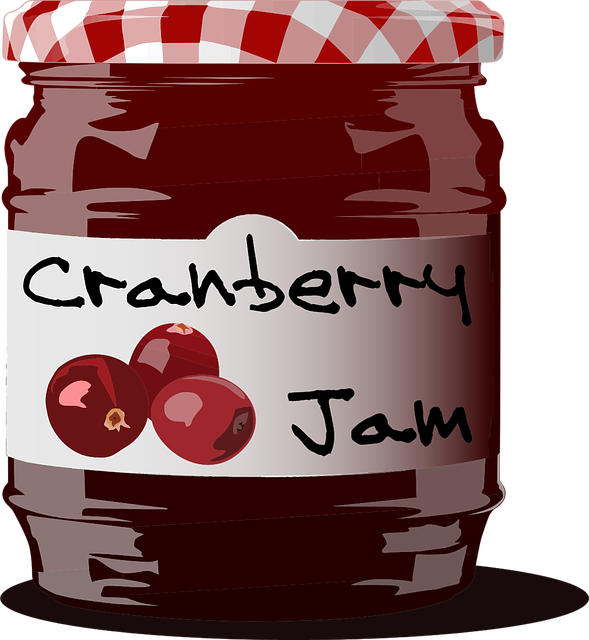

In [1]:
import base64
from IPython.display import Image

image_path = "../assets/images/cranberry_jam.png"

# Encode image
with open(image_path, "rb") as file:
    png_bytes = file.read()
    encoded_png = base64.b64encode(png_bytes).decode("utf-8")

Image(image_path, width=200, height=150)

Next, we construct our image-based prompts using LangChain's `HumanMessage` class. We will have five prompts that are based on questions about the image.

In [2]:
from langchain_core.messages import HumanMessage

questions = ["What color are the berries?", "How many times does the letter R appear in this image?", "How many times does the letter P appear in this image", "How many words appear in this image?", "How many total letters in this image?"]

prompts = []
for question in questions:
    prompt = HumanMessage(content=[{"type": "text", "text": question}, {"type": "file", "source_type": "base64", "mime_type": "image/png", "data": encoded_png}])
    prompts.append([prompt])

In this example, we use `ChatVertexAI` to instantiate our LLM, but any [LangChain Chat Model](https://js.langchain.com/docs/integrations/chat/) may be used. Be sure to **replace with your LLM of choice.**

In [3]:
# import sys
# !{sys.executable} -m pip install langchain-google-vertexai
from langchain_google_vertexai import ChatVertexAI

llm = ChatVertexAI(model="gemini-2.5-flash", temperature=1.0)

We can do a quick check to ensure that our formatted `HumanMessage` objects are compatible with our LLM.

In [4]:
# Assert that our constructed HumanMessage instances are compatible with our LLM:
llm.invoke(prompts[0])

AIMessage(content='The berries on the label are a deep red or cranberry red color.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 1296, 'candidates_token_count': 14, 'total_token_count': 1484, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}, {'modality': 2, 'token_count': 1290}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 14}], 'thoughts_token_count': 174, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -3.132226126534598, 'model_name': 'gemini-2.5-flash'}, id='run--5928906b-97ba-4787-adfe-0f9715639104-0', usage_metadata={'input_tokens': 1296, 'output_tokens': 14, 'total_tokens': 1484, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 174}})

<a id='section2'></a>
## 2. Generate LLM Responses and Confidence Scores

In [5]:
import torch

# Set the torch device
if torch.cuda.is_available():  # NVIDIA GPU
    device = torch.device("cuda")
elif torch.backends.mps.is_available():  # macOS
    device = torch.device("mps")
else:
    device = torch.device("cpu")  # CPU
print(f"Using {device.type} device")

Using cuda device


In this demo, we use black-box scoring with the `BlackBoxUQ` class. A similar approach may be implemented with the `WhiteBoxUQ`, `SemanticEntropy`, or `UQEnsemble` classes. Importantly, multimodal functionality is **not** offered for LLM judges, including `LLMPanel` class and judge components of `UQEnsemble`. For more details on implementations of `BlackBoxUQ`, `WhiteBoxUQ`, `SemanticEntropy`, or `UQEnsemble`, refer to the respective demo notebooks.

In [6]:
from uqlm import BlackBoxUQ

bbuq = BlackBoxUQ(llm=llm, scorers=["noncontradiction"], system_prompt="Answer as concisely as possible.", device=device, use_best=False)
result = await bbuq.generate_and_score(prompts=prompts)

Output()

/home/jupyter/uqlm/uqlm/utils/response_generator.py:100: UQLMBetaWarning: Use of BaseMessage in prompts argument is
in beta. Please use it with caution as it may change in future releases.
  beta_warning("Use of BaseMessage in prompts argument is in beta. Please use it with caution as it may change in 
future releases.")

/home/jupyter/uqlm/uqlm/utils/response_generator.py:100: UQLMBetaWarning: Use of BaseMessage in prompts argument is
in beta. Please use it with caution as it may change in future releases.
  beta_warning("Use of BaseMessage in prompts argument is in beta. Please use it with caution as it may change in 
future releases.")

<a id='section3'></a>
## 3. Evaluate Hallucination Detection Performance

Finally, we can check which questions the LLM answered correctly and compare to our UQLM's black-box confidence scores. 

In [7]:
import pandas as pd

pd.set_option("display.max_colwidth", 100)
result_df = result.to_df()
result_df["question"] = questions
result_df[["question", "response", "sampled_responses", "noncontradiction"]]

question   response  \
0                             What color are the berries?  Deep red.   
1  How many times does the letter R appear in this image?          2   
2   How many times does the letter P appear in this image          0   
3                    How many words appear in this image?          2   
4                   How many total letters in this image?         12   

                                           sampled_responses  noncontradiction  
0  [Deep red., Dark red/Maroon., Red., Dark red., Deep red.]          0.999169  
1                                            [3, 3, 2, 3, 2]          0.425142  
2                                        [0, Zero., 0, 0, 0]          0.998532  
3                                     [2, 2, 2, 2, 2 words.]          0.994295  
4                                       [12, 12, 12, 12, 12]          1.000000

We can see that for the four questions with high confidence scores (the `noncontradiction` colunn), the responses are all correct, and for the question with low confidence (*How many times does the letter R appear in this image?*), the response is not correct.